## Import Libary yang dibutuhkan

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

## EDA ( Explorarity Data Analysis )
### Membaca Dataset

In [71]:
df = pd.read_csv('Obesity Classification.csv')
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


### Melihat informasi tiap Kolom dataset

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


### Melihat informasi, jumlah, rata-rata, standar deviasi, dan juga nilai simpangan

In [73]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


### Melihat distribusi data

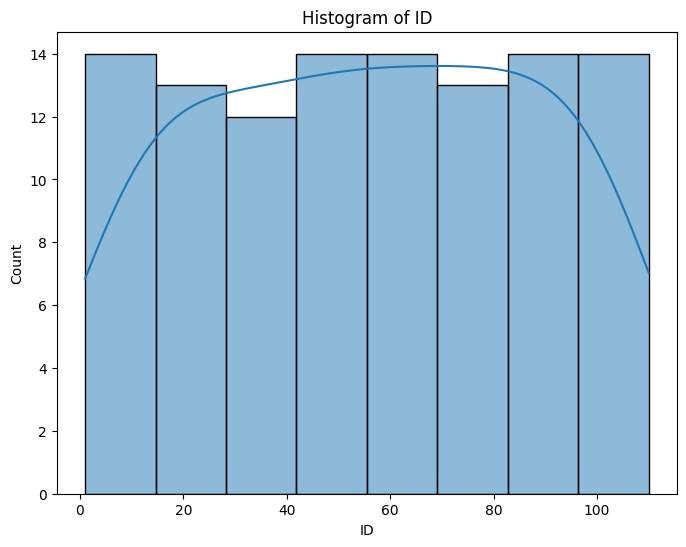

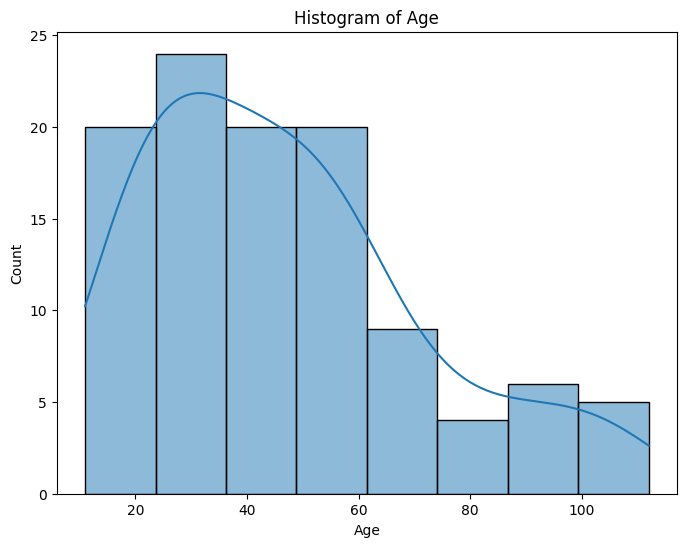

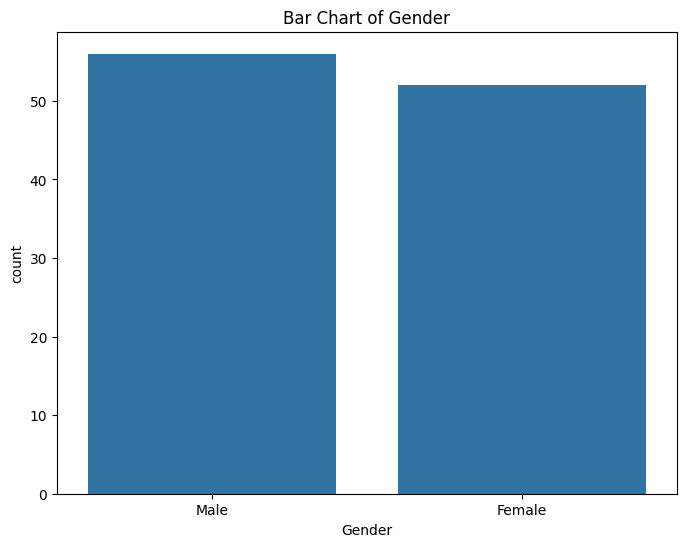

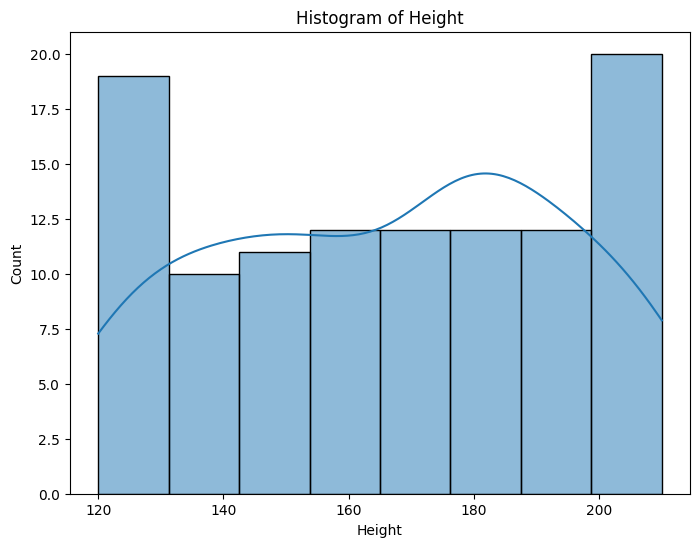

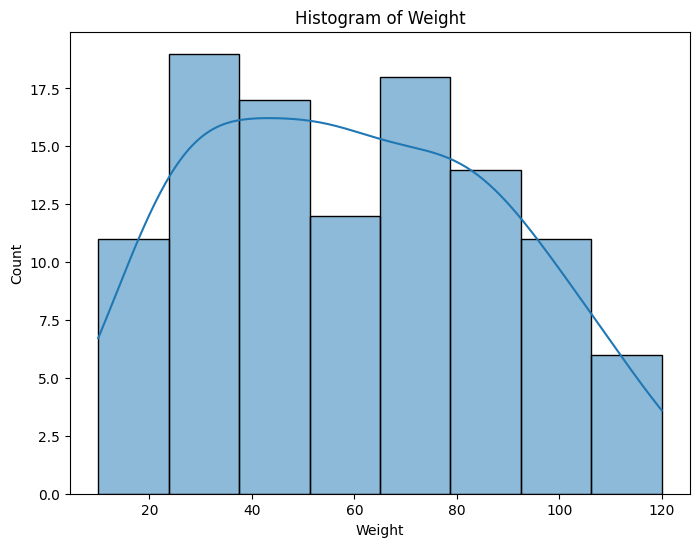

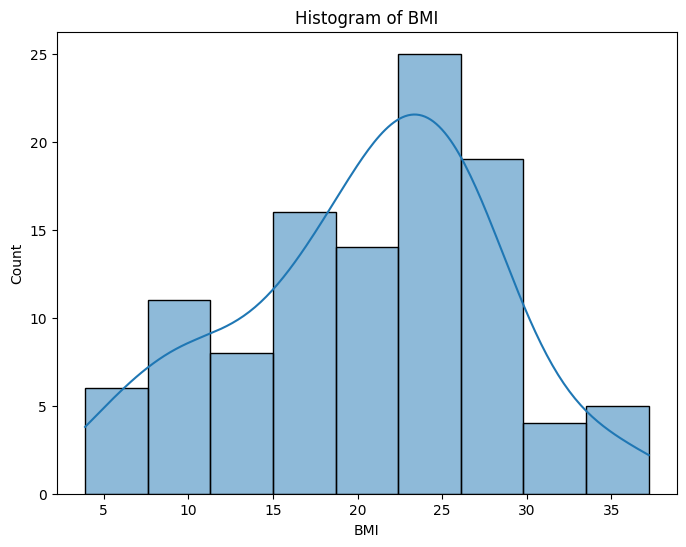

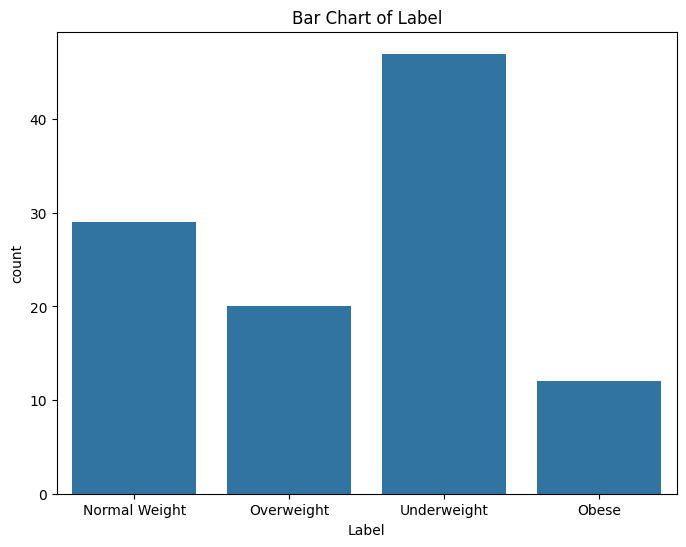

In [74]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df[column], kde=True)
        plt.title(f"Histogram of {column}")
    else:
        sns.countplot(x=column, data=df)
        plt.title(f"Bar Chart of {column}")
    plt.show()

## Cleaning & Preprocessing Data

### Melihat nilai Null

In [75]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


### Melihat nilai duplikat

In [76]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,ID,Age,Gender,Height,Weight,BMI,Label


### Drop atau hapus kolom ID

In [77]:
df.drop(['ID'], axis=1, inplace=True)
df

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


### Melihat outlier dari dataset

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


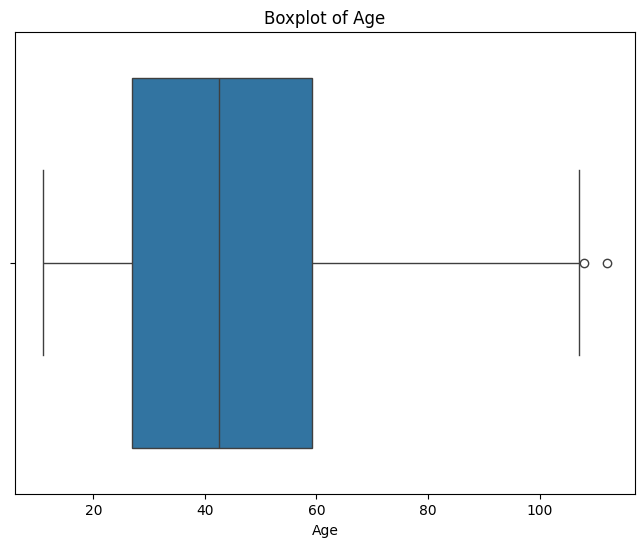

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


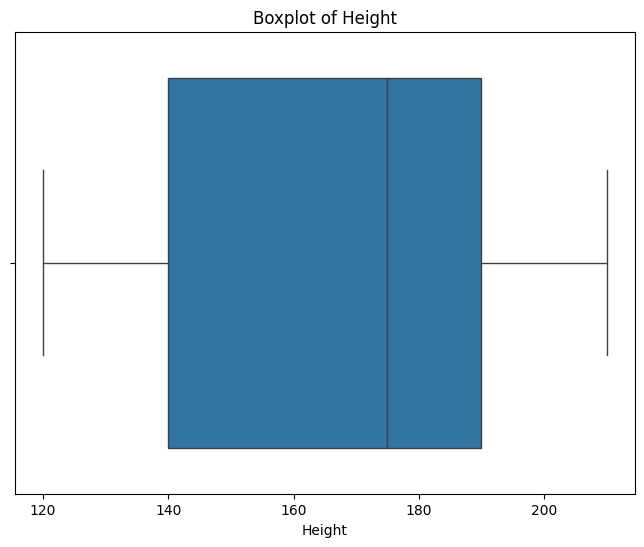

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


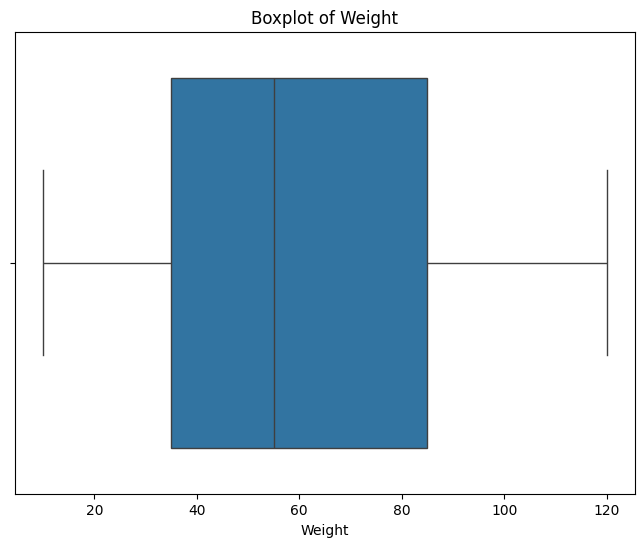

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


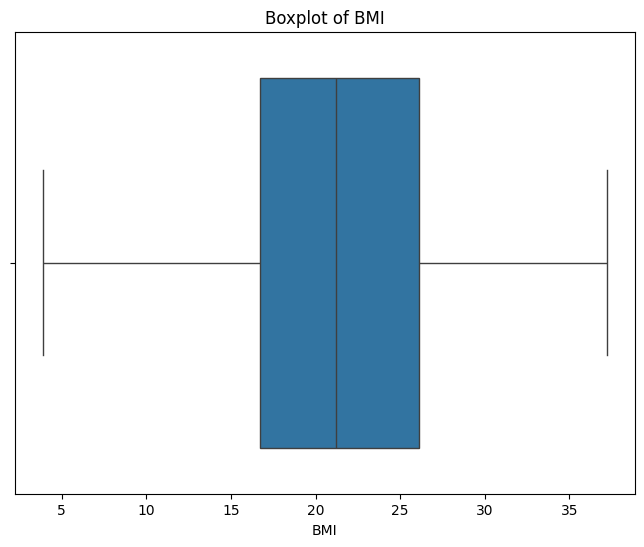

In [78]:
# prompt: melihat outlier dari setiap kolom
import pandas as pd
import matplotlib.pyplot as plt
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


### Normalisasi kolom numerik dari dataset

In [79]:
# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi kolom numerik
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Tampilkan dataframe yang telah dinormalisasi
df


,Age,Gender,Height,Weight,BMI,Label
0,0.138614,Male,0.611111,0.636364,0.642643,Normal Weight
1,0.188119,Female,0.444444,0.454545,0.558559,Normal Weight
2,0.237624,Male,0.666667,0.727273,0.702703,Overweight
3,0.287129,Female,0.333333,0.363636,0.483483,Underweight
4,0.336634,Male,0.777778,0.818182,0.819820,Obese
...,...,...,...,...,...,...
103,0.000000,Male,0.611111,0.000000,0.000000,Underweight
104,0.049505,Female,0.444444,0.000000,0.000000,Underweight
105,0.099010,Male,0.666667,0.045455,0.051051,Underweight
106,0.148515,Female,0.333333,0.045455,0.051051,Underweight


### Encoding kolom Kategorikal

In [80]:

# Pilih kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encoding kolom kategorikal
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

# Tampilkan dataframe yang telah di-encoding
df


,Age,Gender,Height,Weight,BMI,Label
0,0.138614,1,0.611111,0.636364,0.642643,0
1,0.188119,0,0.444444,0.454545,0.558559,0
2,0.237624,1,0.666667,0.727273,0.702703,2
3,0.287129,0,0.333333,0.363636,0.483483,3
4,0.336634,1,0.777778,0.818182,0.819820,1
...,...,...,...,...,...,...
103,0.000000,1,0.611111,0.000000,0.000000,3
104,0.049505,0,0.444444,0.000000,0.000000,3
105,0.099010,1,0.666667,0.045455,0.051051,3
106,0.148515,0,0.333333,0.045455,0.051051,3


### Melihat korelasi antar atribut X dan label Y

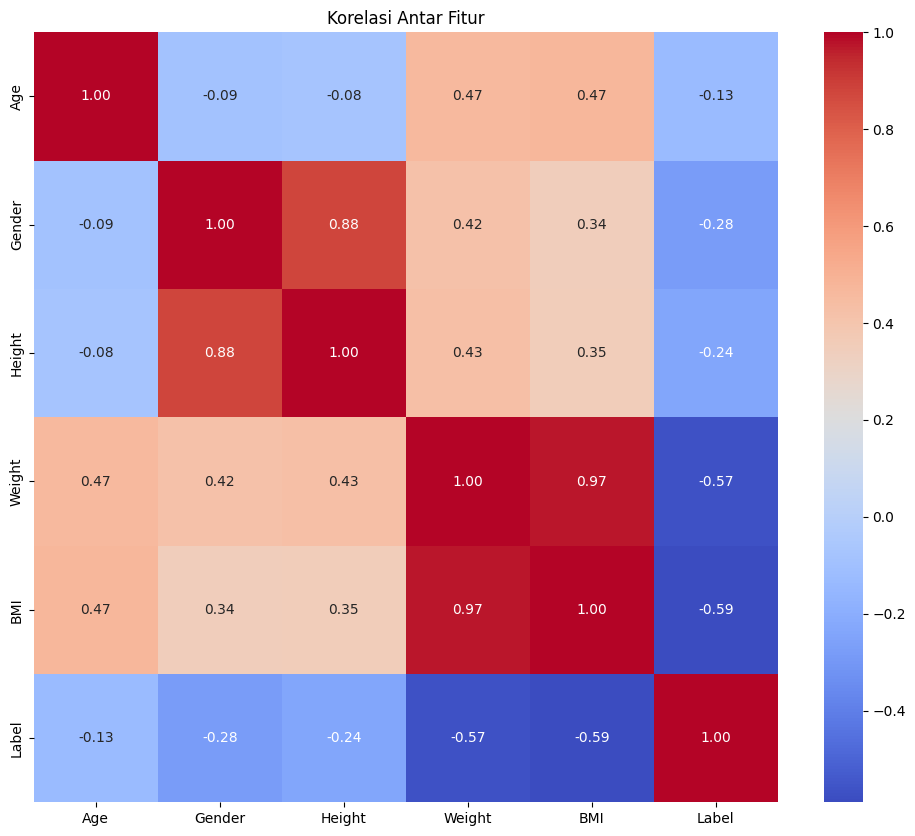

In [81]:
# prompt: aku mau lihat korelasi atribut dengan target atau label menggunakan heatmap

import matplotlib.pyplot as plt
# Menghitung korelasi antar fitur
correlation_matrix = df.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur')
plt.show()


### Melihat jumlah nilai unik di dalam kolom label

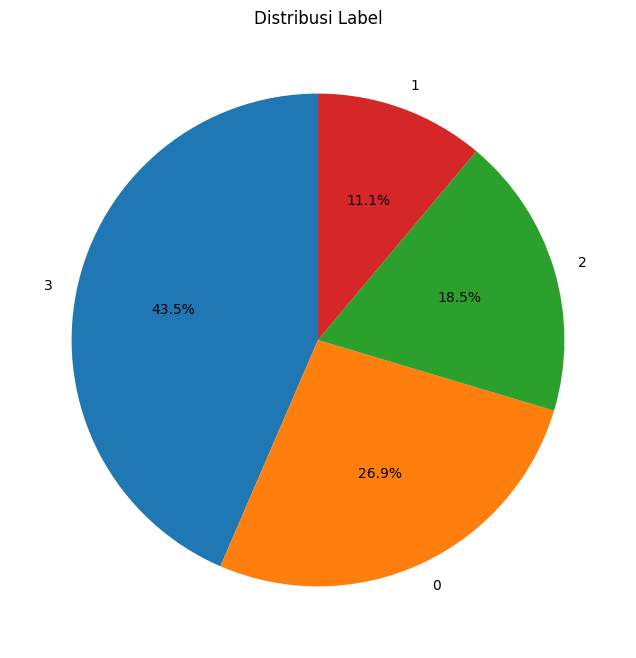

In [82]:
import matplotlib.pyplot as plt
# Hitung jumlah setiap nilai unik dalam kolom 'label'
label_counts = df['Label'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Label')
plt.show()


### Oversampling dan undersampling data menggunakan RandomOverSampler untuk menyetarakan jumlah data setiap kelas

In [83]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Pisahkan fitur dan label
X = df.drop('Label', axis=1)
y = df['Label']

# Inisialisasi RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto')

# Lakukan oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Buat DataFrame baru dari data yang telah di-oversampling
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Tampilkan distribusi label setelah oversampling
print(df_resampled['Label'].value_counts())

# Anda dapat menggunakan df_resampled untuk pelatihan model Anda selanjutnya


Label
0    47
2    47
3    47
1    47
Name: count, dtype: int64


### Menampilkan jumlah data unik di kolom label setelah di Oversampling dan Undersampling

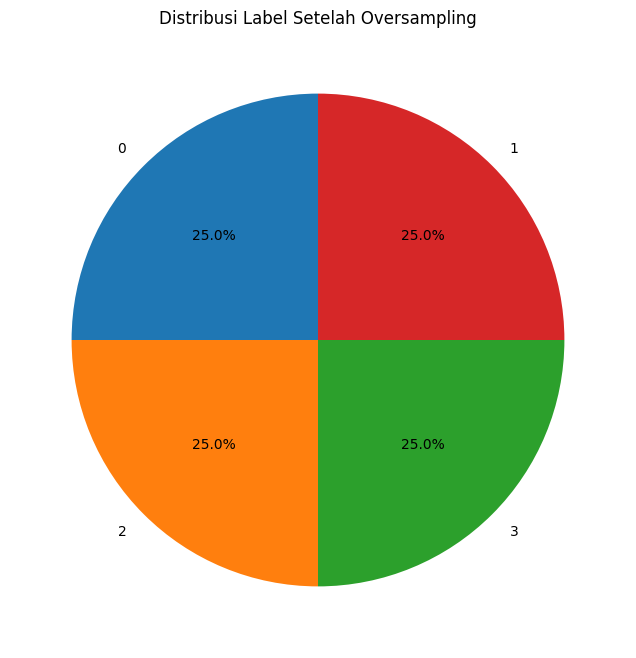

In [84]:
import matplotlib.pyplot as plt
# Hitung jumlah setiap nilai unik dalam kolom 'label' setelah oversampling
label_counts_resampled = df_resampled['Label'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts_resampled, labels=label_counts_resampled.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Label Setelah Oversampling')
plt.show()


### Inisiasi model SVM,KNN, dan Naive Bayes dengan parameter terbaik menggunakan hypermeter Tuning dengan splitting data 90 : 10, 80 : 20, dan 70 : 30

In [85]:
# Pisahkan fitur dan label
X = df_resampled.drop('Label', axis=1)
y = df_resampled['Label']

# Splitting data 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting data 90:10
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

# Splitting data 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes
nb_model = GaussianNB()
param_grid_nb = {}  # Tidak ada hyperparameter yang perlu dituning untuk GaussianNB

# KNN
knn_model = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# SVM
svm_model = SVC()
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}


# Hyperparameter tuning dengan GridSearchCV untuk setiap model dan splitting data
# 80:20
grid_nb_80 = GridSearchCV(nb_model, param_grid_nb, cv=5)
grid_knn_80 = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_svm_80 = GridSearchCV(svm_model, param_grid_svm, cv=5)

grid_nb_80.fit(X_train_80, y_train_80)
grid_knn_80.fit(X_train_80, y_train_80)
grid_svm_80.fit(X_train_80, y_train_80)


# 90:10
grid_nb_90 = GridSearchCV(nb_model, param_grid_nb, cv=5)
grid_knn_90 = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_svm_90 = GridSearchCV(svm_model, param_grid_svm, cv=5)

grid_nb_90.fit(X_train_90, y_train_90)
grid_knn_90.fit(X_train_90, y_train_90)
grid_svm_90.fit(X_train_90, y_train_90)


# 70:30
grid_nb_70 = GridSearchCV(nb_model, param_grid_nb, cv=5)
grid_knn_70 = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_svm_70 = GridSearchCV(svm_model, param_grid_svm, cv=5)

grid_nb_70.fit(X_train_70, y_train_70)
grid_knn_70.fit(X_train_70, y_train_70)
grid_svm_70.fit(X_train_70, y_train_70)




GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

## Evaluation Model

### Menampilkan confussion matrix dari model supervised learning di data 90% training and 10% testing

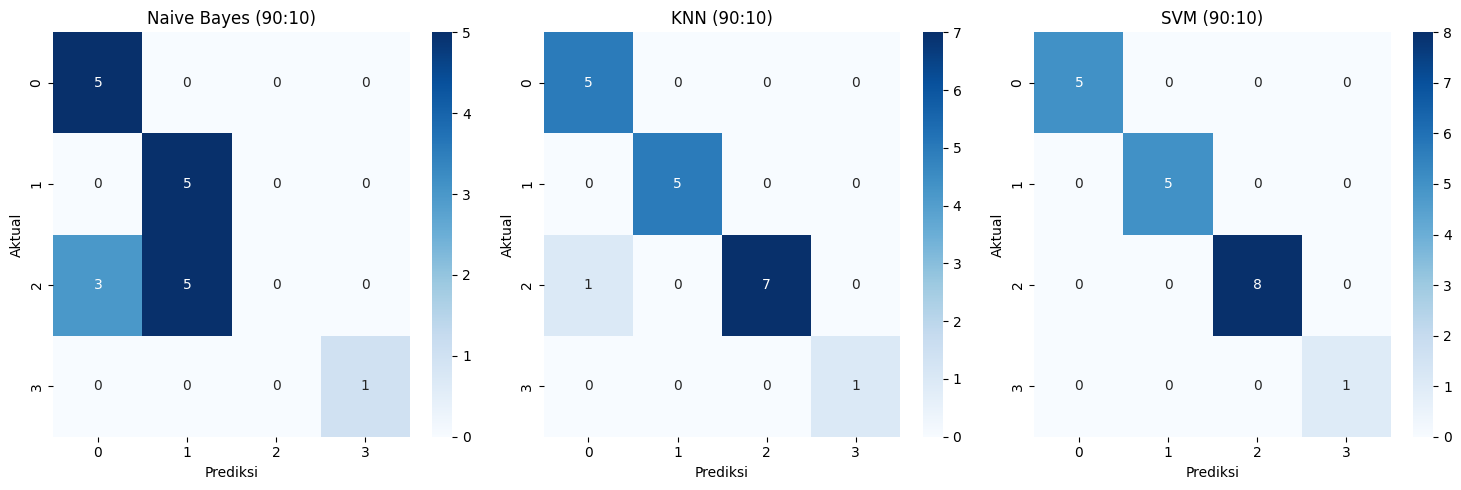

In [86]:
# prompt: tampilkan confusion matrix scara horizontal antara model Naive bayes, KNN dan juga SVM dengan splitting data 90:10

import matplotlib.pyplot as plt
import numpy as np
# Buat prediksi pada data uji untuk setiap model dengan splitting data 90:10
y_pred_nb_90 = grid_nb_90.predict(X_test_90)
y_pred_knn_90 = grid_knn_90.predict(X_test_90)
y_pred_svm_90 = grid_svm_90.predict(X_test_90)

# Buat confusion matrix untuk setiap model dengan splitting data 90:10
cm_nb_90 = confusion_matrix(y_test_90, y_pred_nb_90)
cm_knn_90 = confusion_matrix(y_test_90, y_pred_knn_90)
cm_svm_90 = confusion_matrix(y_test_90, y_pred_svm_90)

# Tampilkan confusion matrix secara horizontal
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_nb_90, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Naive Bayes (90:10)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.subplot(1, 3, 2)
sns.heatmap(cm_knn_90, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('KNN (90:10)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')


plt.subplot(1, 3, 3)
sns.heatmap(cm_svm_90, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('SVM (90:10)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()


### Menampilkan confussion matrix dari model supervised learning di data 80% training and 20% testing

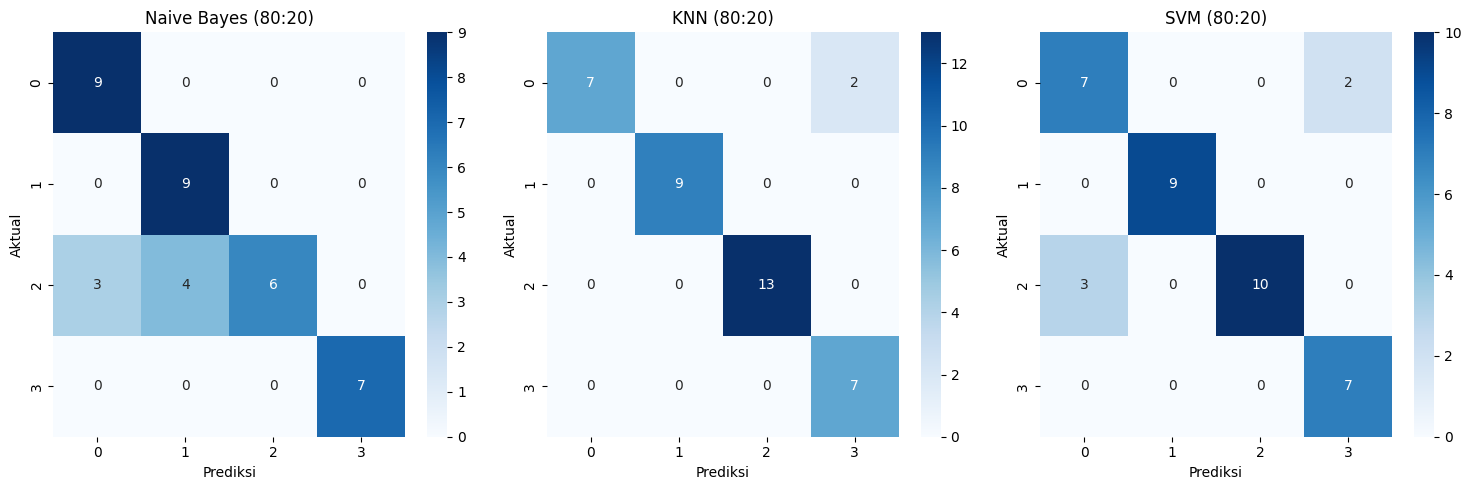

In [87]:
# Buat prediksi pada data uji untuk setiap model dengan splitting data 80:20
y_pred_nb_80 = grid_nb_80.predict(X_test_80)
y_pred_knn_80 = grid_knn_80.predict(X_test_80)
y_pred_svm_80 = grid_svm_80.predict(X_test_80)

# Buat confusion matrix untuk setiap model dengan splitting data 80:20
cm_nb_80 = confusion_matrix(y_test_80, y_pred_nb_80)
cm_knn_80 = confusion_matrix(y_test_80, y_pred_knn_80)
cm_svm_80 = confusion_matrix(y_test_80, y_pred_svm_80)

# Tampilkan confusion matrix secara horizontal
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_nb_80, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Naive Bayes (80:20)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.subplot(1, 3, 2)
sns.heatmap(cm_knn_80, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('KNN (80:20)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')


plt.subplot(1, 3, 3)
sns.heatmap(cm_svm_80, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('SVM (80:20)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()


### Menampilkan confussion matrix dari model supervised learning di data 70% training and 30% testing

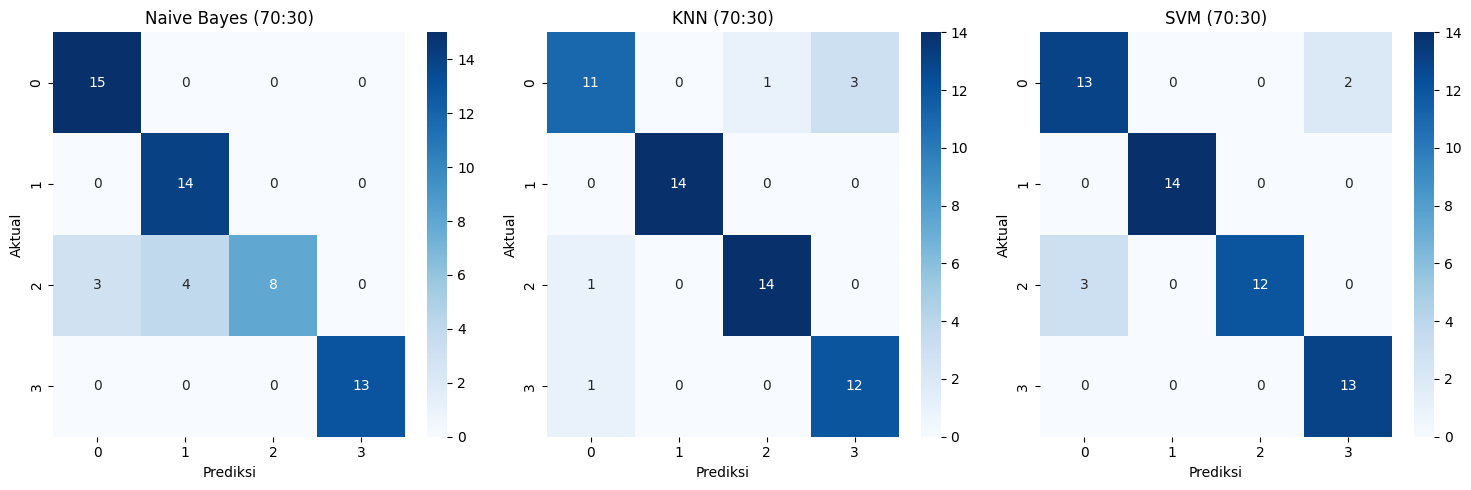

In [88]:
# Buat prediksi pada data uji untuk setiap model dengan splitting data 70:30
y_pred_nb_70 = grid_nb_70.predict(X_test_70)
y_pred_knn_70 = grid_knn_70.predict(X_test_70)
y_pred_svm_70 = grid_svm_70.predict(X_test_70)

# Buat confusion matrix untuk setiap model dengan splitting data 70:30
cm_nb_70 = confusion_matrix(y_test_70, y_pred_nb_70)
cm_knn_70 = confusion_matrix(y_test_70, y_pred_knn_70)
cm_svm_70 = confusion_matrix(y_test_70, y_pred_svm_70)

# Tampilkan confusion matrix secara horizontal
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_nb_70, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Naive Bayes (70:30)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.subplot(1, 3, 2)
sns.heatmap(cm_knn_70, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('KNN (70:30)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')


plt.subplot(1, 3, 3)
sns.heatmap(cm_svm_70, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('SVM (70:30)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()


### Menampilkan perbadingan classification report dari model di splitting 90% training dan 10% testing

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


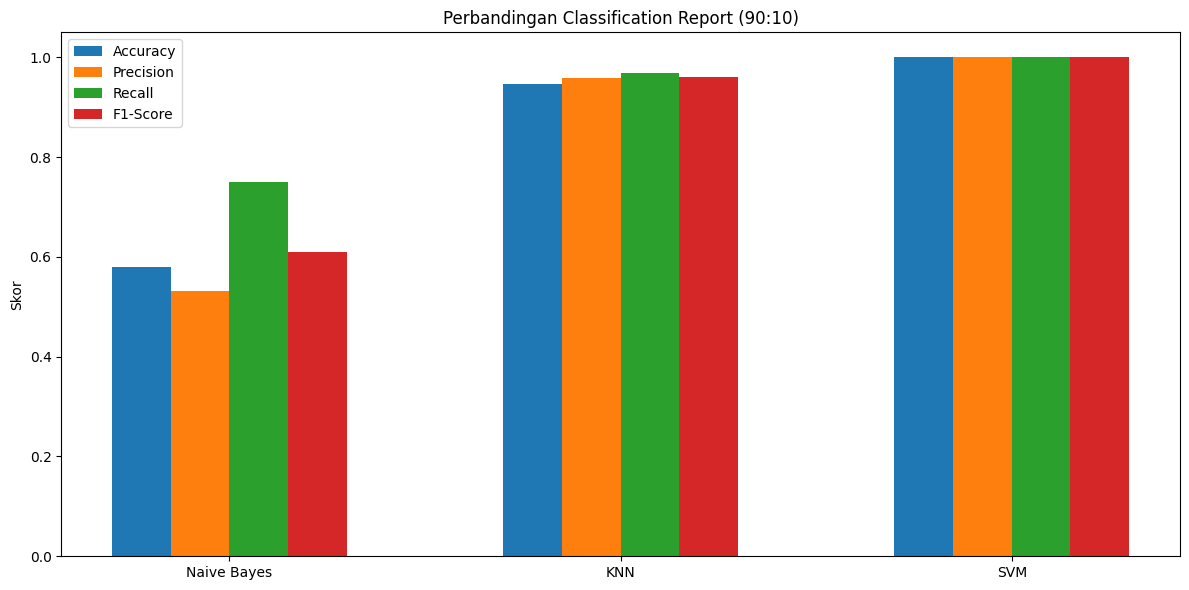

In [89]:
# prompt: tampilkan perbandingan classification report dari model di spilitting 90:10 menggunakan diagram

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Mendapatkan classification report untuk setiap model dengan splitting 90:10
report_nb_90 = classification_report(y_test_90, y_pred_nb_90, output_dict=True)
report_knn_90 = classification_report(y_test_90, y_pred_knn_90, output_dict=True)
report_svm_90 = classification_report(y_test_90, y_pred_svm_90, output_dict=True)

# Membuat fungsi untuk mengambil nilai akurasi, precision, recall, f1-score dari classification report
def get_metrics(report):
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    return accuracy, precision, recall, f1_score


# Mengambil metrik untuk setiap model
accuracy_nb_90, precision_nb_90, recall_nb_90, f1_nb_90 = get_metrics(report_nb_90)
accuracy_knn_90, precision_knn_90, recall_knn_90, f1_knn_90 = get_metrics(report_knn_90)
accuracy_svm_90, precision_svm_90, recall_svm_90, f1_svm_90 = get_metrics(report_svm_90)


# Membuat diagram perbandingan
labels = ['Naive Bayes', 'KNN', 'SVM']
accuracy = [accuracy_nb_90, accuracy_knn_90, accuracy_svm_90]
precision = [precision_nb_90, precision_knn_90, precision_svm_90]
recall = [recall_nb_90, recall_knn_90, recall_svm_90]
f1_score = [f1_nb_90, f1_knn_90, f1_svm_90]

x = range(len(labels))

plt.figure(figsize=(12, 6))
width = 0.15

plt.bar([i - 1.5 * width for i in x], accuracy, width=width, label='Accuracy')
plt.bar([i - 0.5 * width for i in x], precision, width=width, label='Precision')
plt.bar([i + 0.5 * width for i in x], recall, width=width, label='Recall')
plt.bar([i + 1.5 * width for i in x], f1_score, width=width, label='F1-Score')

plt.xticks(x, labels)
plt.ylabel('Skor')
plt.title('Perbandingan Classification Report (90:10)')
plt.legend()
plt.tight_layout()
plt.show()


### Menampilkan perbadingan classification report dari model di splitting 80% training dan 20% testing

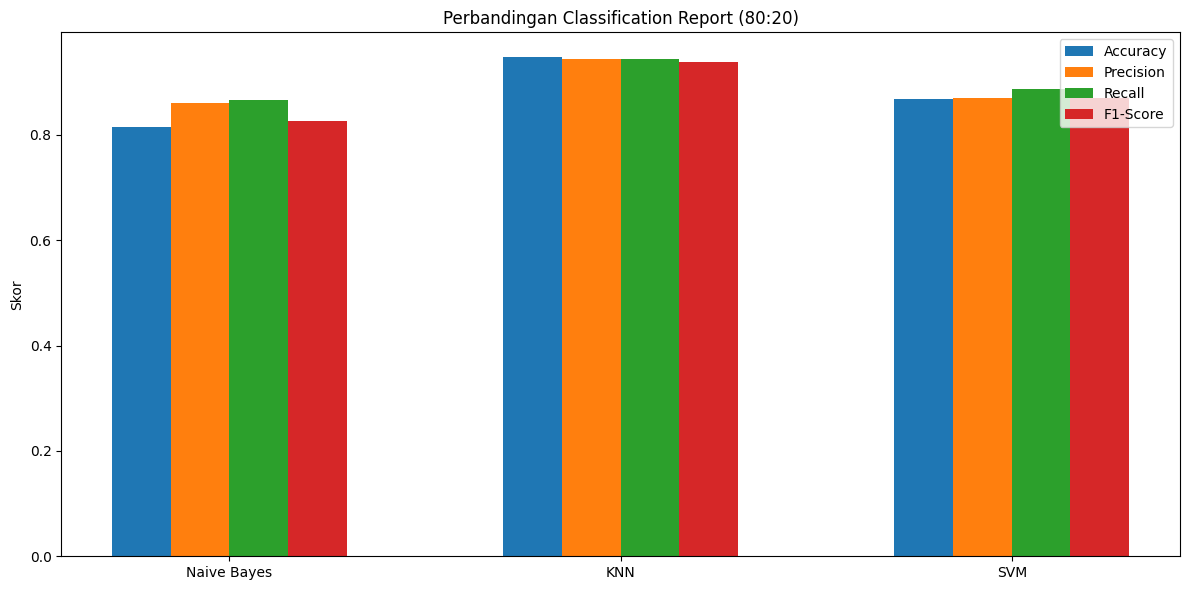

In [90]:
# Mendapatkan classification report untuk setiap model dengan splitting 80:20
report_nb_80 = classification_report(y_test_80, y_pred_nb_80, output_dict=True)
report_knn_80 = classification_report(y_test_80, y_pred_knn_80, output_dict=True)
report_svm_80 = classification_report(y_test_80, y_pred_svm_80, output_dict=True)

# Mengambil metrik untuk setiap model
accuracy_nb_80, precision_nb_80, recall_nb_80, f1_nb_80 = get_metrics(report_nb_80)
accuracy_knn_80, precision_knn_80, recall_knn_80, f1_knn_80 = get_metrics(report_knn_80)
accuracy_svm_80, precision_svm_80, recall_svm_80, f1_svm_80 = get_metrics(report_svm_80)


# Membuat diagram perbandingan
labels = ['Naive Bayes', 'KNN', 'SVM']
accuracy = [accuracy_nb_80, accuracy_knn_80, accuracy_svm_80]
precision = [precision_nb_80, precision_knn_80, precision_svm_80]
recall = [recall_nb_80, recall_knn_80, recall_svm_80]
f1_score = [f1_nb_80, f1_knn_80, f1_svm_80]

x = range(len(labels))

plt.figure(figsize=(12, 6))
width = 0.15

plt.bar([i - 1.5 * width for i in x], accuracy, width=width, label='Accuracy')
plt.bar([i - 0.5 * width for i in x], precision, width=width, label='Precision')
plt.bar([i + 0.5 * width for i in x], recall, width=width, label='Recall')
plt.bar([i + 1.5 * width for i in x], f1_score, width=width, label='F1-Score')

plt.xticks(x, labels)
plt.ylabel('Skor')
plt.title('Perbandingan Classification Report (80:20)')
plt.legend()
plt.tight_layout()
plt.show()


### Menampilkan perbadingan classification report dari model di splitting 70% training dan 30% testing

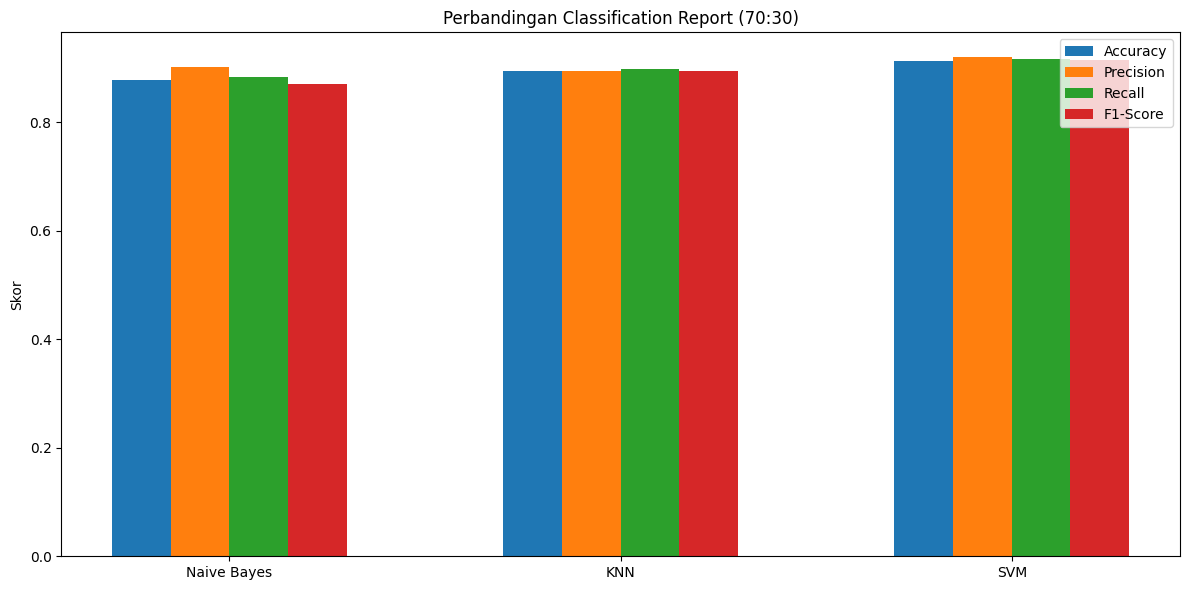

In [91]:
# prompt: tampilkan perbandingan classification report dari model di spilitting 70:30 menggunakan diagram

import matplotlib.pyplot as plt
# Mendapatkan classification report untuk setiap model dengan splitting 70:30
report_nb_70 = classification_report(y_test_70, y_pred_nb_70, output_dict=True)
report_knn_70 = classification_report(y_test_70, y_pred_knn_70, output_dict=True)
report_svm_70 = classification_report(y_test_70, y_pred_svm_70, output_dict=True)

# Mengambil metrik untuk setiap model
accuracy_nb_70, precision_nb_70, recall_nb_70, f1_nb_70 = get_metrics(report_nb_70)
accuracy_knn_70, precision_knn_70, recall_knn_70, f1_knn_70 = get_metrics(report_knn_70)
accuracy_svm_70, precision_svm_70, recall_svm_70, f1_svm_70 = get_metrics(report_svm_70)


# Membuat diagram perbandingan
labels = ['Naive Bayes', 'KNN', 'SVM']
accuracy = [accuracy_nb_70, accuracy_knn_70, accuracy_svm_70]
precision = [precision_nb_70, precision_knn_70, precision_svm_70]
recall = [recall_nb_70, recall_knn_70, recall_svm_70]
f1_score = [f1_nb_70, f1_knn_70, f1_svm_70]

x = range(len(labels))

plt.figure(figsize=(12, 6))
width = 0.15

plt.bar([i - 1.5 * width for i in x], accuracy, width=width, label='Accuracy')
plt.bar([i - 0.5 * width for i in x], precision, width=width, label='Precision')
plt.bar([i + 0.5 * width for i in x], recall, width=width, label='Recall')
plt.bar([i + 1.5 * width for i in x], f1_score, width=width, label='F1-Score')

plt.xticks(x, labels)
plt.ylabel('Skor')
plt.title('Perbandingan Classification Report (70:30)')
plt.legend()
plt.tight_layout()
plt.show()


### Melihat perbandingan akurasi dari model yang sudah di buat dari berbagai splitting data

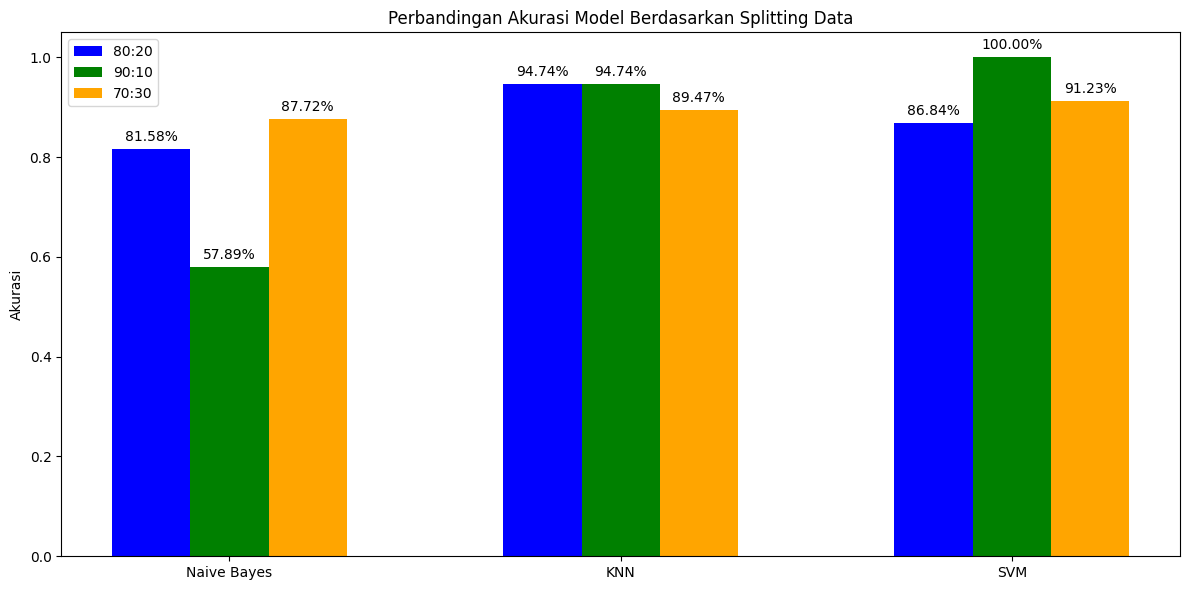

In [94]:
import matplotlib.pyplot as plt
# Mendapatkan akurasi untuk setiap model dan splitting data
accuracies_80 = [accuracy_score(y_test_80, y_pred_nb_80), accuracy_score(y_test_80, y_pred_knn_80), accuracy_score(y_test_80, y_pred_svm_80)]
accuracies_90 = [accuracy_score(y_test_90, y_pred_nb_90), accuracy_score(y_test_90, y_pred_knn_90), accuracy_score(y_test_90, y_pred_svm_90)]
accuracies_70 = [accuracy_score(y_test_70, y_pred_nb_70), accuracy_score(y_test_70, y_pred_knn_70), accuracy_score(y_test_70, y_pred_svm_70)]

# Membuat diagram perbandingan
labels = ['Naive Bayes', 'KNN', 'SVM']
x = range(len(labels))
width = 0.2

plt.figure(figsize=(12, 6))

plt.bar([i - width for i in x], accuracies_80, width=width, label='80:20', color='blue')
plt.bar(x, accuracies_90, width=width, label='90:10', color='green')
plt.bar([i + width for i in x], accuracies_70, width=width, label='70:30', color='orange')

# Menambahkan label persentase di atas setiap bar
for i, v in enumerate(accuracies_80):
    plt.text(i - width, v + 0.01, f'{v:.2%}', ha='center', va='bottom', fontsize=10)
for i, v in enumerate(accuracies_90):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom', fontsize=10)
for i, v in enumerate(accuracies_70):
    plt.text(i + width, v + 0.01, f'{v:.2%}', ha='center', va='bottom', fontsize=10)

plt.xticks(x, labels)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model Berdasarkan Splitting Data')
plt.legend()
plt.tight_layout()
plt.show()


## Save Model KNN 80 % Traning dan 20 % testing

In [93]:
import pickle
from google.colab import files

# Simpan model KNN dengan splitting 80:20 ke file pickle
filename = 'knn_model_80_20.pkl'
pickle.dump(grid_knn_80, open(filename, 'wb'))

# Unduh file pickle
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

- Secara umum, model SVM dan KNN menunjukkan performa yang lebih baik dibandingkan dengan model Naive Bayes pada semua splitting data.
Model SVM cenderung menghasilkan akurasi tertinggi, terutama pada splitting data 90:10 dan 80:20.
- Model KNN juga memberikan akurasi yang tinggi dan bersaing dengan SVM, terutama pada splitting data 70:30.
- Splitting data 90:10 umumnya menghasilkan akurasi tertinggi untuk ketiga model, menunjukkan bahwa data training yang lebih banyak dapat meningkatkan performa.
- Splitting data 80:20 memberikan hasil yang sedikit lebih rendah dibandingkan 90:10, tetapi masih tergolong baik.
- Splitting data 70:30 menghasilkan akurasi terendah di antara ketiga splitting data, mengindikasikan bahwa data training yang lebih sedikit dapat menurunkan performa model.
- Oversampling menggunakan RandomOverSampler efektif dalam menyeimbangkan distribusi kelas dan meningkatkan performa, terutama untuk kelas minoritas.
Hyperparameter tuning dengan GridSearchCV membantu mengoptimalkan performa model dengan menemukan kombinasi hyperparameter terbaik.

## Saran

- Untuk performa terbaik, model SVM dengan splitting data 90:10 direkomendasikan.
- Jika menginginkan keseimbangan antara performa dan jumlah data training, model KNN dengan splitting data 80:20 bisa menjadi alternatif.
- Model Naive Bayes kurang direkomendasikan karena akurasinya yang relatif lebih rendah dibandingkan SVM dan KNN.
- Penting untuk mempertimbangkan karakteristik dataset dan kebutuhan spesifik saat memilih model dan splitting data.